# Linear Regression of Boston Housing Dataset

### 1. Exploratory Data Analysis 
### 2. Model Building
### 3. Performance Analysis

1. Problem Statement : To predict price of house
2. Dataset : Boston_Housing Excel

### Working of Linear Regression 

Linear Regression is a supervised learning algorithm which predicts a continous value based on the value of its predictors. It works by obtaining a best fit line of the residual errors, such that the distance between the actual target variable and the predicted target variable is to minimum. This is also called as R square and it is how we measure the performance of the linear regression model. Incase, the number of predictors become too large we can use Adjusted R square as its performance measure.

Linear Regression makes use of the line function y= mx + c, and initializes the values of m and c by making use of the cost/loss function to find out the values of its coefficients.It uses repeat convergence algorithm to come to a global minima point, which forms a convex curve called as the Gradient Descent. The Gradient Descent along with the learning curve decides on the optimal value of global minima.

Linear Regression follows the below assumptions:

1. Linear Regression assumes that all its predictors follow a Guassian Distribution.The Target variable may or may not follow gussain distribution. 
2. It assumes that all its predictor variables are independently uncorrelated.
3. It assumes a linear relationship between its predictor and target variables. 
4. The variance of residuals is same as any value of x

Ridge, Lasso and Elastic Net Regression

1. Ridge Regression is used when the distribution has overfitting
2. Lasso regression is used when there are outliers in the dataset
3. Elastic Regression is a combination of both Ridge and Lasso and hence is used to solve both the issues



### 1.1 Importing Dataset

In [20]:
#Import basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#to ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [5]:
#Import Machine Learning Libraries
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [6]:
df= pd.read_excel("Boston_Housing.xlsx")

In [7]:
df.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


### 1.2 Statistical Analysis

In [17]:
# to check datatypes of all predictors
# all datatypes are float or int types
df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX          int64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object


1. CRIM     per capita crime rate by town 
2. ZN         proportion of residential land zoned for lots over 25,000 sq.ft. 
3. INDUS    proportion of non-retail business acres per town. 
4. CHAS     Charles River dummy variable (1 if tract bounds river; 0 otherwise) 
5. NOX       nitric oxides concentration (parts per 10 million) 
6. RM        average number of rooms per dwelling 
7. AGE       proportion of owner-occupied units built prior to 1940 
8. DIS       weighted distances to five Boston employment centres 
9. RAD      index of accessibility to radial highways 
10. TAX      full-value property-tax rate per dollar 10,000
11. PTRATIO  pupil-teacher ratio by town 
12. B      1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town 
13. LSTAT Percent lower status of the population 
14. MEDV Median value of owner-occupied homes in dollar 1000

In [13]:
# to check statistical significance of all predictors
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [19]:
# checking null data
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

There is no null value in the data

In [18]:
# check info of the data
df.shape

(506, 14)

### Dataset Observation

1. The dataset contains 506 rows and 14 columns
2. Last column is the target variable and the remaining columns are predictors
3. There is no null value in the dataset
4. All variables are numerical variables

### Predictor Values Observation 

1. Crime rate values : 0.006320	to 88.976200
2. Residential land zoned for lots over 25,000 sq.ft. :00 to 100
3. Charles River dummy variable : 0 and 1
4. Nitric oxides concentration (parts per 10 million): 0.385000 to 0.871000
5. Average number of rooms per dwelling: 3.561000 to 8.780000
6. Proportion of owner-occupied units built prior to 1940: 2.900000 to 100.00
7. Weighted distances to five Boston employment centres: 1.129600 to 12.126500	
8. Index of accessibility to radial highways: 1.000000	to 24.000000
9. Pupil-teacher ratio by town : 12.600000 to 22.000000
10. Bk is the proportion of blacks by town: 0.320000 to 396.900000
11.  Percent lower status of the population: 1.730000 to 37.970000	
12. Median value of owner-occupied homes in dollar 1000 : 5.000000 to 50.000000

## 2. Graphical Analysis of data

### 2.1 Univariate Analysis

The term univariate analysis refers to the analysis of one variable prefix "uni" means "one". The purpose of univariate analysis is to understand the distribution of values for a single variable

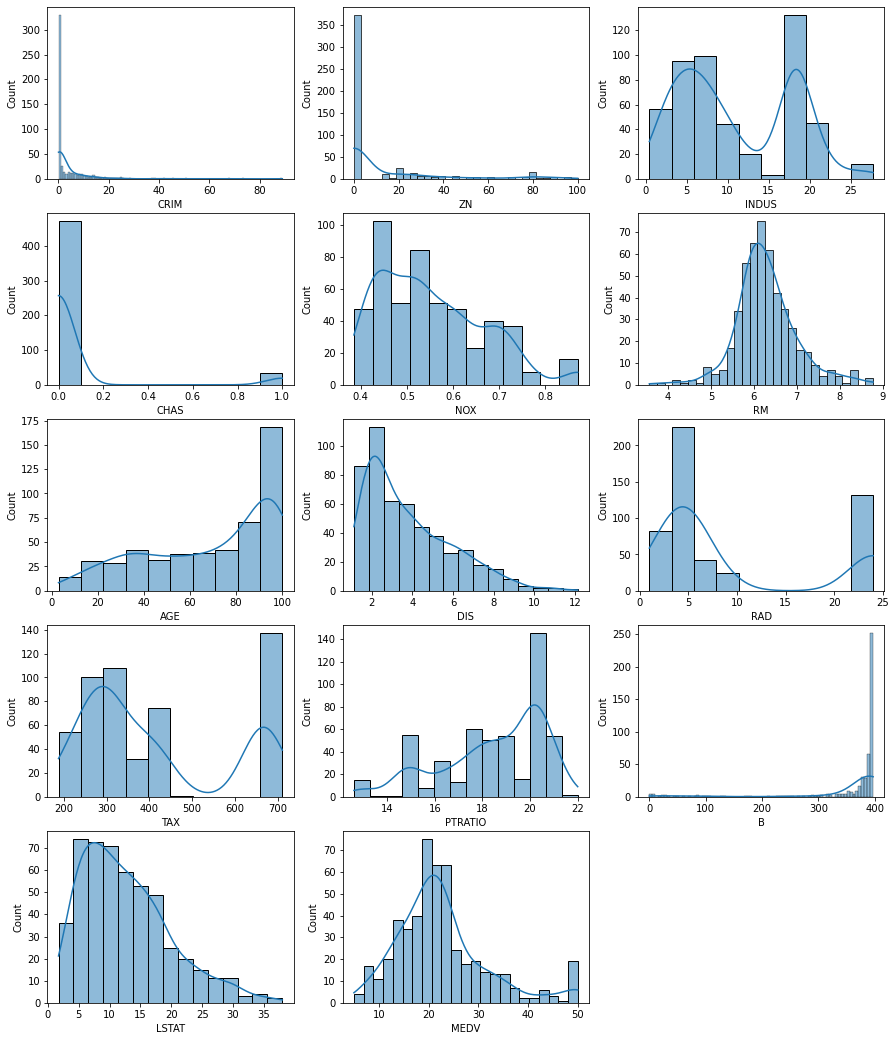

In [30]:
plt.figure(figsize=(15,60), facecolor='white')
plotnumber =1

for column in df:
    ax = plt.subplot(16,3,plotnumber)
    sns.histplot(df[column],kde=True)
    plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.show()

### Observation

1. Crime Rate and Zonal Land Owned are heavily Right Skewed
2. Dis, NOX, LSTAT are moderately right skewed
3. RM and MEDV follow guassian distribution
4. PTRATO, AGE and B are heavily Left Skewed

### 2.2 Checking for outliers

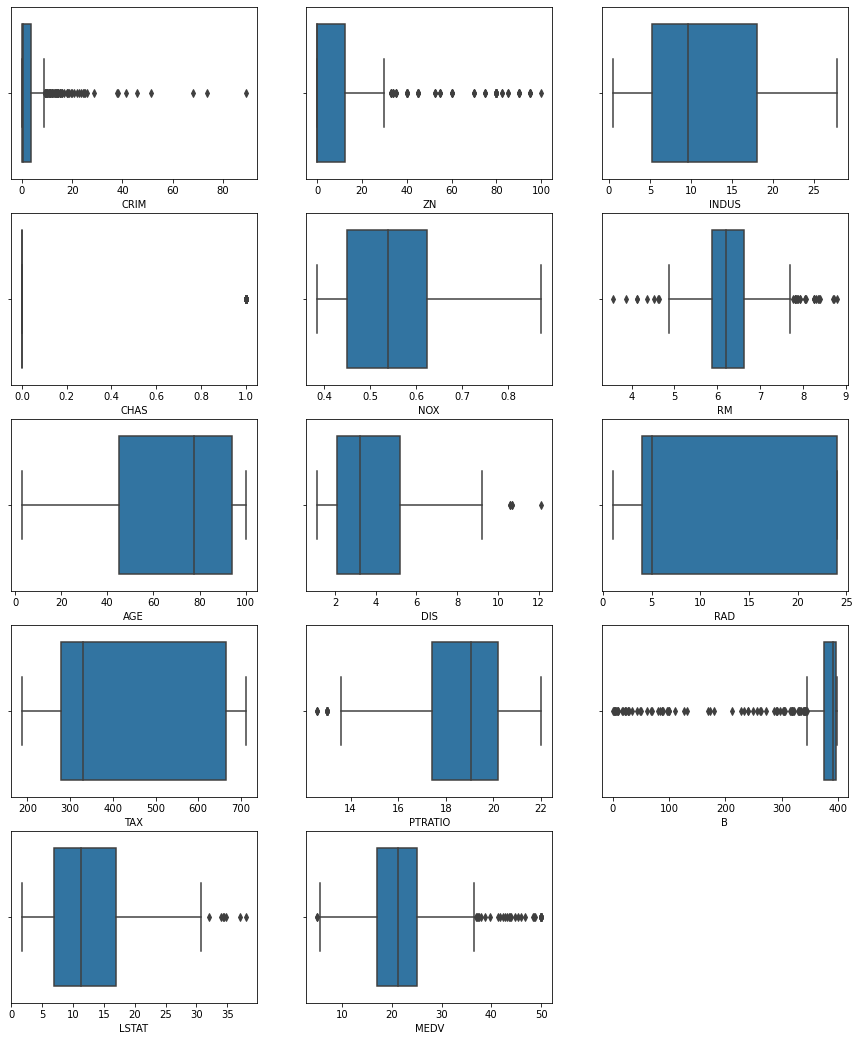

In [34]:
plt.figure(figsize=(15,60), facecolor='white')
plotnumber =1

for column in df:
    ax = plt.subplot(16,3,plotnumber)
    sns.boxplot(df[column])
    plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.show()

### Observation

1. 8 out of 14 predictors has outliers including target variable
2. We will keep outliers of target variable as is
3. 1 out of all 8 predictors has outlier on both the sides
4. 2 predictors have outliers in left side
5. 5 predictors have outliers in right side 

### 2.3 Correlation Analysis

In [35]:
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


<AxesSubplot:>

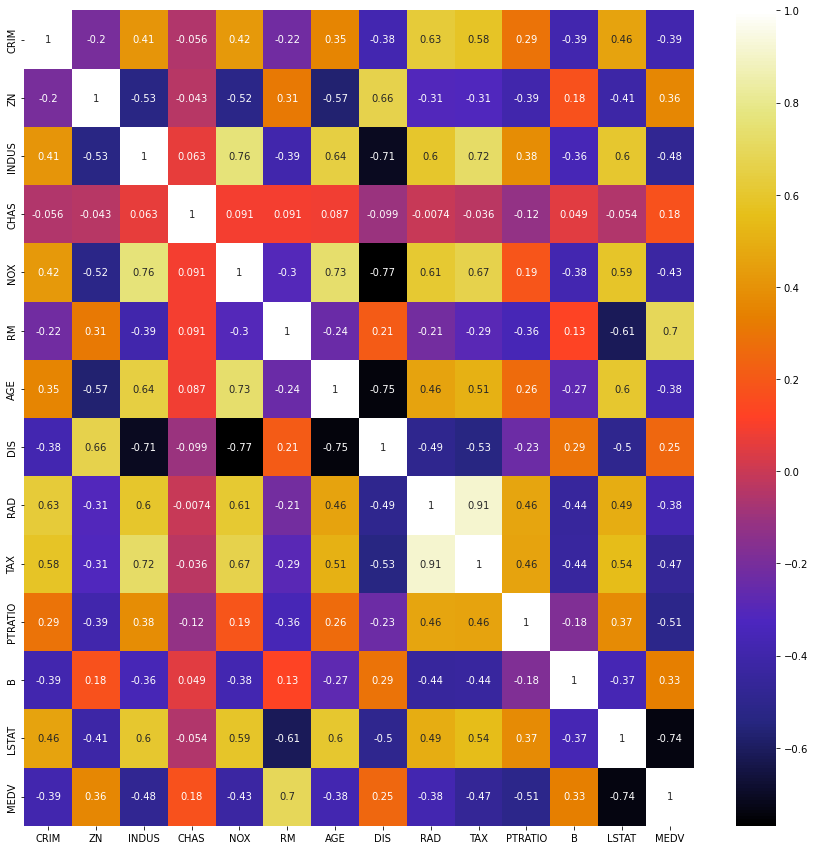

In [40]:
plt.figure(figsize=(15,15), facecolor='white')
sns.heatmap(df.corr(), annot=True, cmap ="CMRmap")

1. There is high correlation between RAD index of accessibility to radial highways and TAX full-value property-tax rate per dollar 10,000
2. There is negative correlation between LSTAT Percent lower status of the population and MEDV Median value of owner-occupied homes in dollar 1000
3. There is high negative correlation between CRIM per capita crime rate by town and MEDV Median value of owner-occupied homes in dollar 1000

### 2.4 Scatter Plot Analysis

In [93]:
#Now we check the individual relationship between all predictor variables and target variable

<AxesSubplot:xlabel='MEDV', ylabel='CRIM'>

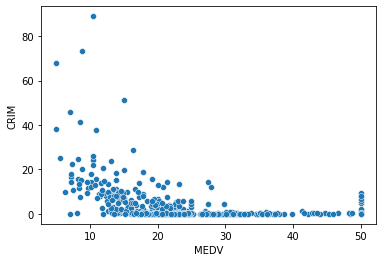

In [68]:
sns.scatterplot(data=df, y="CRIM", x="MEDV")

<AxesSubplot:xlabel='MEDV', ylabel='INDUS'>

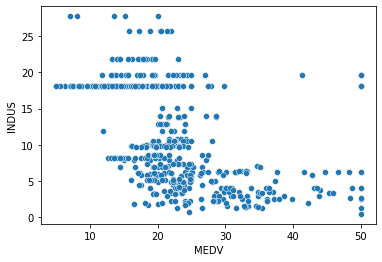

In [67]:
sns.scatterplot(data=df, y="INDUS", x="MEDV")

<AxesSubplot:xlabel='MEDV', ylabel='CHAS'>

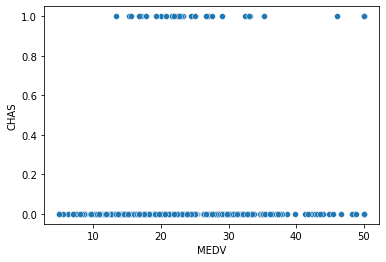

In [66]:
sns.scatterplot(data=df, y="CHAS", x="MEDV")

<AxesSubplot:xlabel='MEDV', ylabel='NOX'>

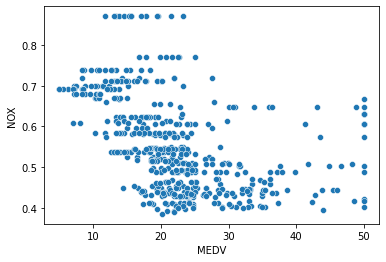

In [65]:
sns.scatterplot(data=df, y="NOX", x="MEDV")

<AxesSubplot:xlabel='MEDV', ylabel='RM'>

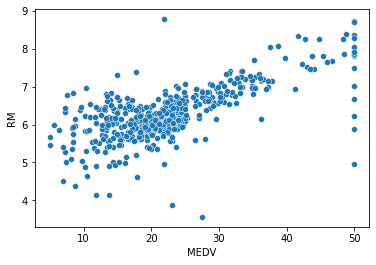

In [64]:
sns.scatterplot(data=df, y="RM", x="MEDV")

<AxesSubplot:xlabel='MEDV', ylabel='AGE'>

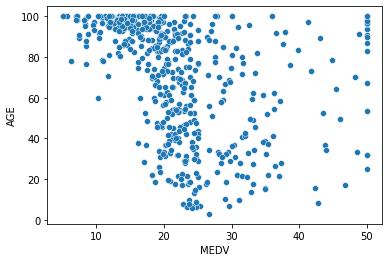

In [63]:
sns.scatterplot(data=df, y="AGE", x="MEDV")

<AxesSubplot:xlabel='MEDV', ylabel='DIS'>

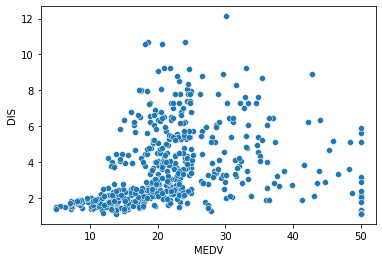

In [62]:
sns.scatterplot(data=df, y="DIS", x="MEDV")

<AxesSubplot:xlabel='MEDV', ylabel='RAD'>

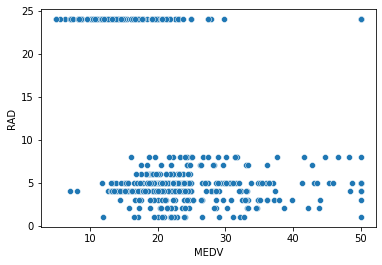

In [57]:
sns.scatterplot(data=df, y="RAD", x="MEDV")

<AxesSubplot:xlabel='MEDV', ylabel='TAX'>

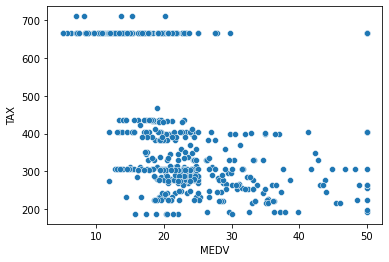

In [58]:
sns.scatterplot(data=df, y="TAX", x="MEDV")

<AxesSubplot:xlabel='MEDV', ylabel='PTRATIO'>

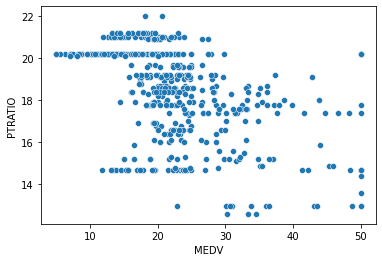

In [59]:
sns.scatterplot(data=df, y="PTRATIO", x="MEDV")

<AxesSubplot:xlabel='MEDV', ylabel='B'>

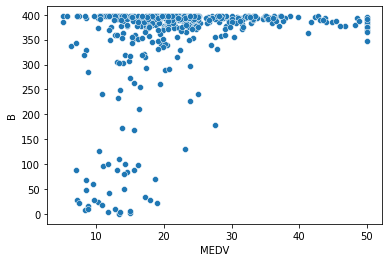

In [60]:
sns.scatterplot(data=df, y="B", x="MEDV")

<AxesSubplot:xlabel='MEDV', ylabel='LSTAT'>

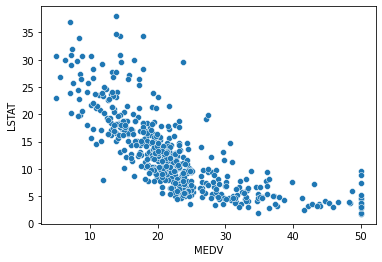

In [61]:
sns.scatterplot(data=df, y="LSTAT", x="MEDV")

### Observations

1.There is a positive linear relationship between average number of rooms per dwelling and median value of owner occupied homes
2.There is linear negative relationship between median value of homes and percent lower status of population


## 3. Model Building

### 3.1 Spliiting of predictors and target variable

In [256]:
# assigning  0 to 13 columns to x variable
x=df.iloc[:,0:13]

In [257]:
# assiging last column to y
y=df.iloc[:,-1]

In [258]:
x.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10


In [259]:
y.head(10)

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
5    28.7
6    22.9
7    27.1
8    16.5
9    18.9
Name: MEDV, dtype: float64

### 3.2 Importing Train Test Split

In [260]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

In [261]:
scaler = StandardScaler()

In [262]:
scaler

StandardScaler()

In [263]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.33)

In [264]:
X_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
376,15.28800,0.0,18.10,0,0.671,6.649,93.3,1.3449,24,666,20.2,363.02,23.24
193,0.02187,60.0,2.93,0,0.401,6.800,9.9,6.2196,1,265,15.6,393.37,5.03
103,0.21161,0.0,8.56,0,0.520,6.137,87.4,2.7147,5,384,20.9,394.47,13.44
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48
153,2.14918,0.0,19.58,0,0.871,5.709,98.5,1.6232,5,403,14.7,261.95,15.79


In [265]:
y_train.head(10)

376    13.9
193    31.1
103    19.3
504    22.0
153    19.4
172    23.1
454    14.9
76     20.0
179    37.2
370    50.0
Name: MEDV, dtype: float64

In [266]:
X_test.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
275,0.09604,40.0,6.41,0,0.447,6.854,42.8,4.2673,4,254,17.6,396.9,2.98
294,0.08199,0.0,13.92,0,0.437,6.009,42.3,5.5027,4,289,16.0,396.9,10.40
66,0.04379,80.0,3.37,0,0.398,5.787,31.1,6.6115,4,337,16.1,396.9,10.24
97,0.12083,0.0,2.89,0,0.445,8.069,76.0,3.4952,2,276,18.0,396.9,4.21
218,0.11069,0.0,13.89,1,0.550,5.951,93.8,2.8893,5,276,16.4,396.9,17.92


In [267]:
y_test.head(5)

275    32.0
294    21.7
66     19.4
97     38.7
218    21.5
Name: MEDV, dtype: float64

In [268]:
X_train.shape, y_train.shape

((339, 13), (339,))

In [269]:
X_test.shape, y_test.shape

((167, 13), (167,))

In [270]:
scaler = StandardScaler()

In [271]:
X_train = scaler.fit_transform(X_train)

In [272]:
X_test = scaler.fit_transform(X_test)

In [273]:
regr = LinearRegression()
regr.fit(X_train, y_train)

LinearRegression()

In [274]:
regr.score(X_test, y_test)

0.777768529037407

In [275]:
regr.coef_

array([-1.07335596,  1.25463121,  0.47693897,  0.94702394, -2.363219  ,
        2.05322526,  0.25169753, -3.36880964,  2.62763447, -2.36230503,
       -1.83138871,  0.70259179, -4.31058394])

In [276]:
regr.intercept_

22.52182890855457

In [110]:
y_pred = regr.predict(X_test)

In [277]:
y_pred

array([19.02583909, 22.18453947, 21.27019286, 17.15488022,  5.0338117 ,
       22.20184838, 18.39949908, 17.45077283, 18.7776907 , 20.28057089,
       11.97276367, 19.11694899, 18.32263671, 12.03628743, 24.56783181,
       13.78777223, 26.49708592, 16.39046376, 19.84924282, 31.33025047,
       22.52914451, 14.45388558, 12.68609597, 21.40223584, 22.64261615,
       11.33900215, 20.39151931, 18.02950364, 17.51750725, 13.24505563,
       22.29654432, 26.61488619, 16.14696854, 13.6269193 , 18.50753887,
       20.37978323, 15.82165324, 17.36435888, 16.87124313, 15.76018007,
       21.17499966, 19.51117187, 14.101226  , 16.53774557, 18.16765835,
       22.11040825, 22.78166912,  6.86931115, 16.09994329, 20.95629219,
       21.07954583, 21.33576491, 20.20195512, 18.85314419, 14.73991416,
       20.871108  , 11.34454033, 17.2529227 , 18.18621448, 16.21598059,
       16.18304192, 19.59028807, 24.13268194, 40.95597991, 19.88145389,
       16.87221018, 14.37253649, 20.52976934, 19.56381779, 19.69

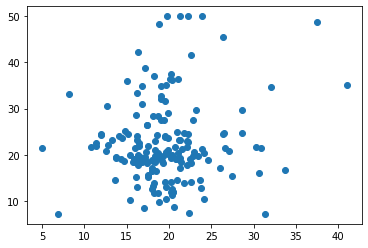

In [278]:
plt.scatter(y_pred,y_test)

<AxesSubplot:xlabel='MEDV', ylabel='Count'>

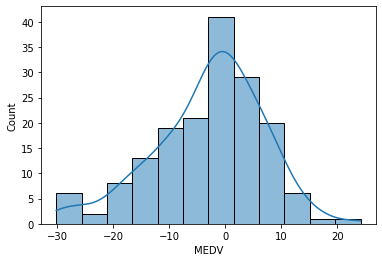

In [279]:
residuals = y_pred-y_test
sns.histplot(x=y_pred-y_test, kde=True)

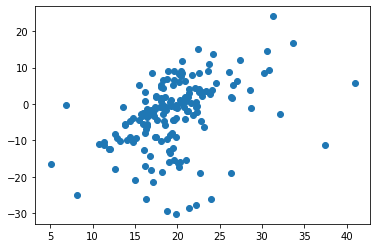

In [280]:
plt.scatter(x=y_pred,y=residuals)

In [281]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

In [282]:
print(f'Mean absolute error: {mae:.2f}')
print(f'Mean squared error: {mse:.2f}')
print(f'Root mean squared error: {rmse:.2f}')

Mean absolute error: 7.58
Mean squared error: 103.18
Root mean squared error: 10.16


### 3.5 Applying Lasso Regression

In [283]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

In [284]:
model = Lasso(alpha = 0.05)
model.fit(X_train, y_train)

Lasso(alpha=0.05)

In [285]:
model.score(X_test, y_test)

0.7819224652822183

In [286]:
model.coef_

array([-0.94201927,  1.04701092,  0.        ,  0.97007548, -1.93105366,
        2.12702579,  0.03589681, -3.17567965,  1.77489724, -1.5015986 ,
       -1.70560132,  0.65284478, -4.24125737])

In [287]:
model.intercept_

22.52182890855457

In [288]:
y_pred = model.predict(X_test)

In [289]:
mae = mean_absolute_error(y_test , y_pred )
mse= mean_squared_error(y_test , y_pred )
rmse = np.sqrt(mse)

In [290]:
print(f'Mean absolute error: {mae:.2f}')
print(f'Mean squared error: {mse:.2f}')
print(f'Root mean squared error: {rmse:.2f}')

Mean absolute error: 3.16
Mean squared error: 17.50
Root mean squared error: 4.18


In [291]:
y_pred = model.predict(X_test)

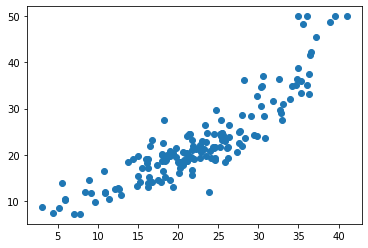

In [292]:
plt.scatter(y_pred,y_test)

<AxesSubplot:xlabel='MEDV', ylabel='Count'>

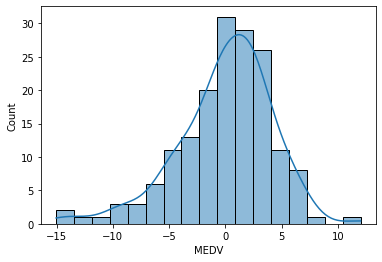

In [293]:
residuals = y_pred-y_test
sns.histplot(x=y_pred-y_test, kde=True)

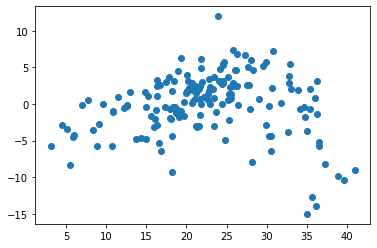

In [294]:
plt.scatter(x=y_pred,y=residuals)

### 3.5 Applying Ridge Regression

In [295]:
model_ridge = Ridge(alpha = 0.05)
model_ridge.fit(X_train, y_train)

Ridge(alpha=0.05)

In [296]:
model_ridge.score(X_test, y_test)

0.7778116979736658

In [297]:
model_ridge.coef_

array([-1.0727262 ,  1.25342648,  0.47456641,  0.94731966, -2.3606886 ,
        2.05402971,  0.25101614, -3.36661162,  2.6222307 , -2.35684766,
       -1.83074917,  0.70260766, -4.30948753])

In [298]:
model_ridge.intercept_

22.52182890855457

In [299]:
y_pred = model.predict(X_test)

In [300]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

In [301]:
print(f'Mean absolute error: {mae_2:.2f}')
print(f'Mean squared error: {mse_2:.2f}')
print(f'Root mean squared error: {rmse_2:.2f}')

Mean absolute error: 3.23
Mean squared error: 21.09
Root mean squared error: 4.59


In [228]:
y_pred = model_ridge.predict(X_test)

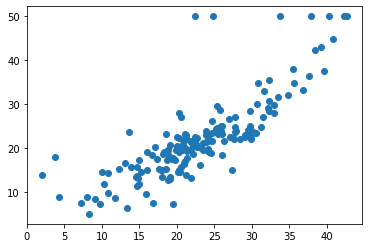

In [229]:
plt.scatter(y_pred,y_test)

<AxesSubplot:xlabel='MEDV', ylabel='Count'>

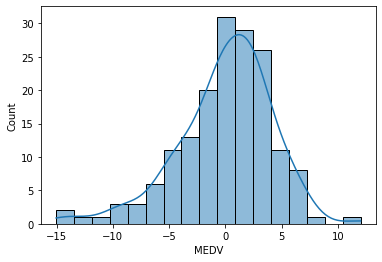

In [302]:
residuals = y_pred-y_test
sns.histplot(x=y_pred-y_test, kde=True)

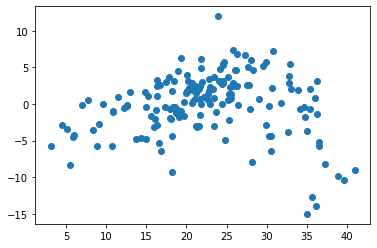

In [303]:
plt.scatter(x=y_pred,y=residuals)

### 3.6 ElasticNet Regression

In [304]:
 from sklearn.linear_model import ElasticNet

In [305]:
reg_elastic = ElasticNet(random_state=0)

In [306]:
reg_elastic.fit(X_train, y_train)

ElasticNet(random_state=0)

In [307]:
reg_elastic.score(X_test, y_test)

0.702763596114595

In [308]:
reg_elastic.coef_

array([-0.40875467,  0.11000396, -0.12764393,  0.66057751, -0.29135016,
        2.03256655, -0.        , -0.        , -0.        , -0.35178411,
       -1.09319442,  0.48110213, -2.58168845])

In [309]:
reg_elastic.intercept_

22.52182890855457

In [310]:
y_pred = reg_elastic.predict(X_test)

In [311]:
mae = mean_absolute_error(y_test , y_pred )
mse = mean_squared_error(y_test , y_pred )
rmse  = np.sqrt(mse )

In [312]:
print(f'Mean absolute error: {mae_3:.2f}')
print(f'Mean squared error: {mse_3:.2f}')
print(f'Root mean squared error: {rmse_3:.2f}')

Mean absolute error: 3.47
Mean squared error: 23.53
Root mean squared error: 4.85


In [313]:
y_pred = reg_elastic.predict(X_test)

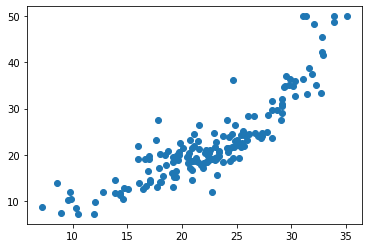

In [314]:
plt.scatter(y_pred,y_test)

<AxesSubplot:xlabel='MEDV', ylabel='Count'>

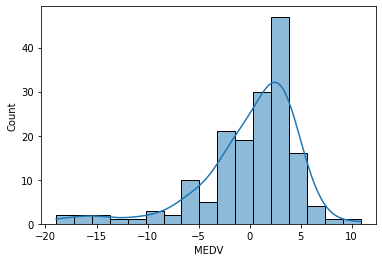

In [315]:
residuals = y_pred-y_test
sns.histplot(x=y_pred-y_test, kde=True)

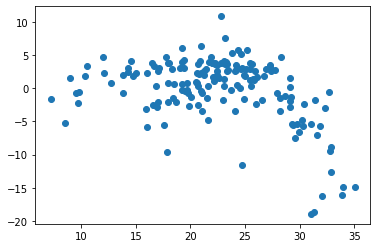

In [316]:
plt.scatter(x=y_pred,y=residuals)

## 3. Comparison of all Models/ Performance Analysis

The R Square Values for Linear Regression, Lasso, Ridge and Elastic Net is 77 %, 78 %, 77 % and 70 % respectively

The Cost Function Values for Linear Regression is : 

> Mean absolute error: 7.58
> Mean squared error: 103.18
> Root mean squared error: 10.16


#### From above statistics Lasso Regression has performed better than other types and hence we can go ahead and imporve it further.